### Курсовой проект
<b><i>Шелашень Арина</i></b>
## Разведочный анализ данных датасета с характеристиками вин

### Загрузка библиотек

In [270]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from math import sqrt

### Загрузка данных

In [271]:
df = pd.read_csv('winequality-red.csv')

### Краткий обзор данных

In [272]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [273]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


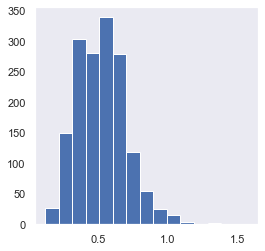

In [274]:
df['volatile acidity'].hist(figsize=(4, 4), bins=15, grid=False);

In [275]:
df['volatile acidity'].mode()

0    0.6
dtype: float64

### Задача 1
<br>
1. Проверим гипотезу: качество вина с содержанием летучих кислот до 0.6 г/л не изменится, если кислот будет больше.<br>
Проверяем путём сравнения средних значениях качества вина в двух подвыборках с помощью однофакторного дисперсионного анализа.

In [276]:
#разделяем выборку на две подвыборки по уровню содержания кислот
low_acid = df.loc[df['volatile acidity'] < 0.6, 'quality'] 
high_acid = df.loc[df['volatile acidity'] >= 0.6, 'quality']

In [277]:
n = len(low_acid) + len(high_acid) #общий объем выборки
mean = df['quality'].mean() #среднее по выборке
mean_la = low_acid.mean() #среднее подвыборки 1
n_la = len(low_acid) #объем подвыборки 1
mean_ha = high_acid.mean() #среднее подвыборки 2
n_ha = len(high_acid) #объем подвыборки 2
S = ((df['quality'] - mean)**2).sum()
S_f = ((mean_la - mean)**2 * n_la) + ((mean_ha - mean)**2 * n_ha)
S_res = ((low_acid - mean_la)**2).sum() + ((high_acid - mean_ha)**2).sum() 

In [278]:
round(S, 3) == round(S_f + S_res, 3) #проверяем правильность расчётов

True

In [279]:
alpha = 0.05
k1 = 2 - 1
k2 = n - 2
var = S/(n-1)
var_f = S_f/k1
var_res = S_res/k2
T_crit = var_f/var_res
F_crit = stats.f.ppf(1 - alpha, k1, k2)
print(f'T = {T_crit}\nF = {F_crit}')

T = 158.70893771018493
F = 3.8472882467544105


In [280]:
print(f'Среднее качество вин с разным содержанием летучих кислот:\n\
менее 0,6 г/л: {round(mean_la, 3)};\n\
более 0,6 г/л: {round(mean_ha,3)}.\n\n\
{round(T_crit,3)} > {round(F_crit,3)}\n\
T >> F')

Среднее качество вин с разным содержанием летучих кислот:
менее 0,6 г/л: 5.812;
более 0,6 г/л: 5.301.

158.709 > 3.847
T >> F


Следовательно, отличие средних в исследованных выборках статистически значимо.<br>При содержании летучих кислот меньше 0,6 г/л качество вина вероятнее всего будет выше.

### Задача 2.1
2.1 Определим, имеется ли корреляция между показателем рН (показатель кислотности) и другими характеристиками, связанными с кислотами (содержание связанных кислот, содержание летучих кислот, лимонная кислота, диоксид серы) <br>
* *Диоксид серы используется как консервант, но является кислотным оксидом, т.е. может образовывать кислоту и вносить свой вклад в показатель кислотности*
* *Чем ниже показатель рН, тем выше кислотность*

In [281]:
n = len(df)
n

1599

In [282]:
mean_ph = df['pH'].mean()
mean_acid = df['fixed acidity'].mean()
mean_citr = df['citric acid'].mean()
mean_vol = df['volatile acidity'].mean()
mean_sulf = df['total sulfur dioxide'].mean()

In [283]:
cov_acid = np.cov(df['pH'], df['fixed acidity'])[0][1]
cov_citr = np.cov(df['pH'], df['citric acid'])[0][1]
cov_vol = np.cov(df['pH'], df['volatile acidity'])[0][1]
cov_sulf = np.cov(df['pH'], df['total sulfur dioxide'])[0][1]

In [284]:
std_ph = df['pH'].std()
std_acid = df['fixed acidity'].std()
std_citr = df['citric acid'].std()
std_vol = df['volatile acidity'].std()
std_sulf = df['total sulfur dioxide'].std()

In [285]:
coef_acid = cov_acid/(std_ph * std_acid * n / (n-1))
coef_citr = cov_citr/(std_ph * std_citr * n / (n-1))
coef_vol = cov_vol/(std_ph * std_vol * n / (n-1))
coef_sulf = cov_sulf/(std_ph * std_sulf * n / (n-1))

In [286]:
print(f'Коэффициенты корреляции Пирсона для рН со следующими показателями:\n\
связанные кислоты - {round(coef_acid, 3)};\n\
лимонная кислота - {round(coef_citr, 3)};\n\
летучие кислоты - {round(coef_vol, 3)};\n\
диоксид серы - {round(coef_sulf, 3)}.')

Коэффициенты корреляции Пирсона для рН со следующими показателями:
связанные кислоты - -0.683;
лимонная кислота - -0.542;
летучие кислоты - 0.235;
диоксид серы - -0.066.


Ожидаемо, связь рН с содержанием связанных органических кислот (в т.ч. лимонной) обратно линейная, т.е. чем больше в вине связанных органических кислот, тем ниже показатель рН.<br><br>
Летучие кислоты же наоборот на кислотность влияния не оказывают. Вероятно, они больше определяют органолептические свойства (таким образом и влияют на качество).<br><br>
Диоксид серы очевидно превращается в кислоты серы в незначительном количестве (не оказывает влияния на показатель рН), потому и используется как консервант.

### Задача 2.2
2.2 Определим, от чего больше зависит плотность вина: от содержания алкоголя или от содержания сахаров.

In [287]:
np.corrcoef(df['density'], df['alcohol'])[0][1]

-0.4961797702417019

In [288]:
np.corrcoef(df['density'], df['residual sugar'])[0][1]

0.35528337098337615

Плотность имеет обратную зависимость от содержания алкоголя и прямую - от остаточного содержания сахаров. Причём в вине содержание алкоголя больше влияет на плотность.

### Задача 3
3. Хотела определить, одинаково ли распределены некоторые показатели. Затем решила, что это не имеет практического смысла. Решила вместо этого просто проверить, имеют ли эти показатели нормальное распределение (визуально некоторые из них распределены нормально), но оказалось, что все они - далеки от нормальности :)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

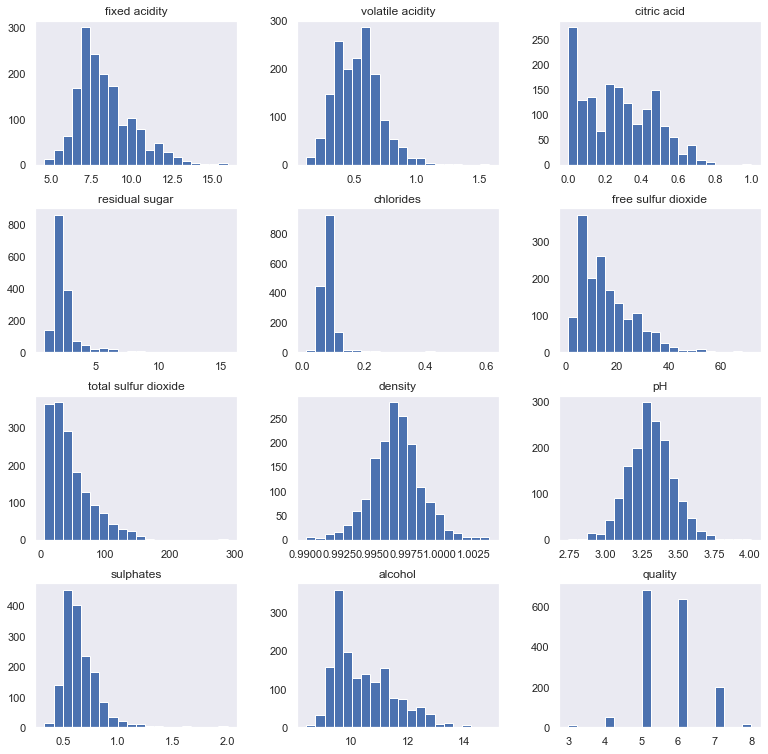

In [289]:
df[df.columns].hist(figsize=(13, 13), bins=20, grid=False)

In [290]:
stats.normaltest(df[df.columns])[1]

array([1.75282777e-049, 7.19258904e-032, 9.66282226e-034, 0.00000000e+000,
       0.00000000e+000, 4.77936533e-075, 1.43389083e-106, 2.14732027e-007,
       4.84686453e-008, 1.17590652e-197, 3.31632885e-034, 1.78450303e-004])

<i> **Но вообще корреляции признаков между собой и с целевым признаком проще смотреть по матрице корреляций:)** </i>

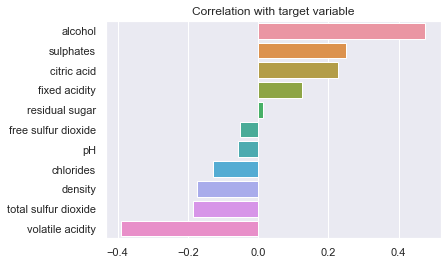

In [291]:
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(6, 4))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

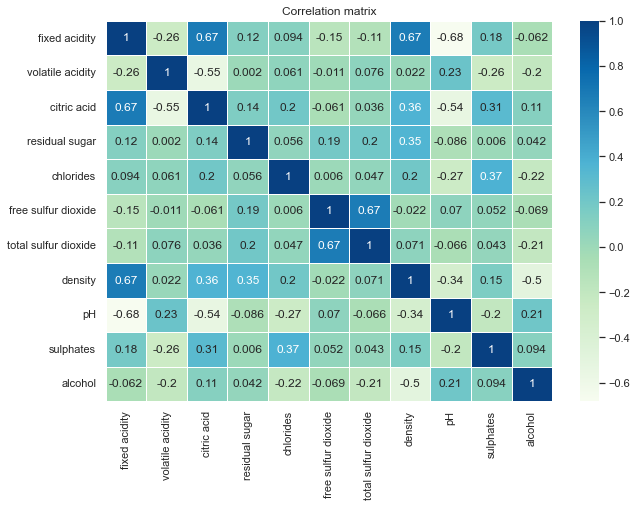

In [292]:
X = df.drop(columns='quality')
plt.figure(figsize = (10,7))

sns.set(font_scale=1)
sns.heatmap(X.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()